In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pygenometracks.tracks import BedTrack

import numpy as np

In [5]:
genes1 = BedTrack({'file': 'data/tf/K562.CTCF.sorted.bed',
                    'title':'1',
                      'display':'collapsed',
                    'labels':'off',
                    'line width':0.1,
                 'color' : '#1f78b4',
                 "min_value":0,
                 'max_value':300})

genes2 = BedTrack({'file': 'data/tf/K562.CTCF.sorted.bed',
                    'title':'123',
                    #  'display':'collapsed',
                    'labels':'234',
                    'line width':0.1,
                 'color' : '#1f78b4',
                 "min_value":0,
                 'max_value':300})


tracks = [[genes1], [genes2]]
tracks = np.asarray(tracks)

coord = '%s:%s-%s' % ("chr1", 800000, 900000)
chrom, start, end = "chr1", 800000, 900000

In [6]:
axes = np.array(axes)

NameError: name 'axes' is not defined

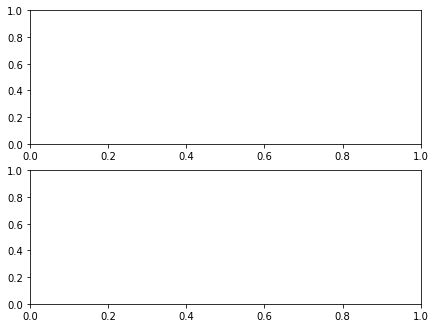

In [7]:
f, axes = plt.subplots(nrows=tracks.shape[0], ncols=1,
                           figsize=(7, 5+tracks.shape[0]/5))

axes = np.array([axes])
axes = axes[:, np.newaxis]

In [110]:
tracks.shape

(2, 1)

In [13]:
import os
#os.chdir(os.path.dirname(__file__))


    
import pygenometracks.tracks as pygtk
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,1,sharex='col')
region = 'chr1',714000,715000
chrom_region,start_region,end_region = region
ax = axs[1]


track_config  = dict(
    file='data/tf/K562.CTCF.sorted.bed')
tk = pygtk.BedTrack(track_config)

tk.plot(ax,chrom_region,start_region,end_region)
#fig.savefig('test-axplot-bigwig.png')
print ('[DONE]')

DEBUG:pygenometracks.tracks.GenomeTrack:ylim 100,0


[DONE]


ValueError: Image size of 239134964x252 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

In [130]:
f, axes = plt.subplots(nrows=tracks.shape[0], ncols=1,
                           figsize=(7, 5+tracks.shape[0]/5))

#axes = np.array([axes])
axes = axes[:, np.newaxis]

            


for (i,j), track in np.ndenumerate(tracks):
    ax = axes[i,j]
    try:
        track.plot(ax, chrom, start, end)
    except KeyError:
        pass
    if 'label' in track.properties:
        ax.text(0, 0.95, track.properties['label'], va='top', ha='left', transform=ax.transAxes,
                    rotation=0, size='small', color=track.properties['color'])
#    ax.set_ylim(0)

for ax in axes.flatten():
        ax.axis('off')
for ax in axes[:-1, :].flatten():
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
for ax in axes[-2:, 0].flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axis('on')
    ax.set_yticks([ax.get_ylim()[-1]])
for ax in axes[-1, :].flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axis('on')
    #ax.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter(sep=''))
for ax in axes[:, 1:].flatten():
    ax.set_yticks([])
    
#axes[1,0].set_xlabel(chrom)
plt.setp(axes[:, :], yticks=[])
#ticklab = axes[0, 0].xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
axes[-1, 0].xaxis.set_label_coords(axes[-1, 0].get_xlim()[0], 0, transform=trans)
plt.setp(axes[:, :], xlim=(start, end))
plt.savefig('data/results/%s_10kb.png' % name, dpi=300, bbox_inches='tight')
plt.close()

DEBUG:pygenometracks.tracks.GenomeTrack:ylim 330.0,0
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 330.0,0


In [2]:
import scipy.sparse as sp
import networkx as nx
import numpy as np

A = np.zeros((4, 4))
A[0][0] = 1
A[1][1] = 1
A[2][2] = 1
A[3][3] = 1

A[0][1] = 2
A[1][3] = 3
A

array([[1., 2., 0., 0.],
       [0., 1., 0., 3.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
G = nx.from_scipy_sparse_matrix(sp.coo_matrix(A))
G

In [20]:
from clusc import *
sparse_to_tuple(sp.coo_matrix(A))[1].shape[0]

6

In [11]:
H = nx.from_scipy_sparse_matrix(nx.adjacency_matrix(G))
H

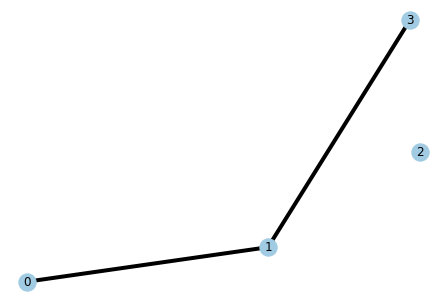

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#pos = nx.spring_layout(G)
pos = nx.spiral_layout(H)
#colors = edges_weight
options = {
    "node_color": "#A0CBE2",
    #"edge_color": colors,
    "width": 4,
    #"edge_cmap": plt.cm.Blues,
    "with_labels": True,
}
nx.draw(H, pos, **options)
#plt.figure(figsize=(12,12))
plt.show()